# Boston House Prices

#### The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970

### Input features (Predictors) in dataset
1) CRIM: per capita crime rate by town
2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town
4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
6) RM: average number of rooms per dwelling
7) AGE: proportion of owner-occupied units built prior to 1940
8) DIS: weighted distances to five Boston employment centres
9) RAD: index of accessibility to radial highways
10) TAX: full-value property-tax rate per 10,000 dollars
11) PTRATIO: pupil-teacher ratio by town
12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13) LSTAT: % lower status of the population

### Target variable in dataset
1) MEDV: Median value of owner-occupied homes in 1000's[k$]

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
from matplotlib import pyplot as plt

## 2. Importing Dataset

In [3]:
df1=pd.read_csv(r"C:\Users\VEMURI VARUN SRI SAI\Desktop\Github\House Price\boston.csv", index_col=False)

In [4]:
df1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df1.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
df1.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
# Calculate the correlation matrix
corr_matrix = df1.corr().abs()  # Absolute value to consider both positive and negative correlations

# Set a threshold for high correlation (e.g., 0.8)
threshold = 0.7

# Find all pairs of highly correlated features
high_corr_var = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                 if i != j and corr_matrix.loc[i, j] > threshold]

# Remove duplicates
high_corr_var = list(set(tuple(sorted(pair)) for pair in high_corr_var))

print("Highly correlated feature pairs:")
for pair in high_corr_var:
    print(f"{pair[0]} and {pair[1]} - Correlation: {corr_matrix.loc[pair[0], pair[1]]:.2f}")

Highly correlated feature pairs:
AGE and DIS - Correlation: 0.75
RAD and TAX - Correlation: 0.91
DIS and INDUS - Correlation: 0.71
INDUS and TAX - Correlation: 0.72
LSTAT and MEDV - Correlation: 0.74
AGE and NOX - Correlation: 0.73
INDUS and NOX - Correlation: 0.76
DIS and NOX - Correlation: 0.77


## 3. Visualization

In [8]:
sns.set(style='whitegrid', palette='muted')

### 3.1 Heatmap

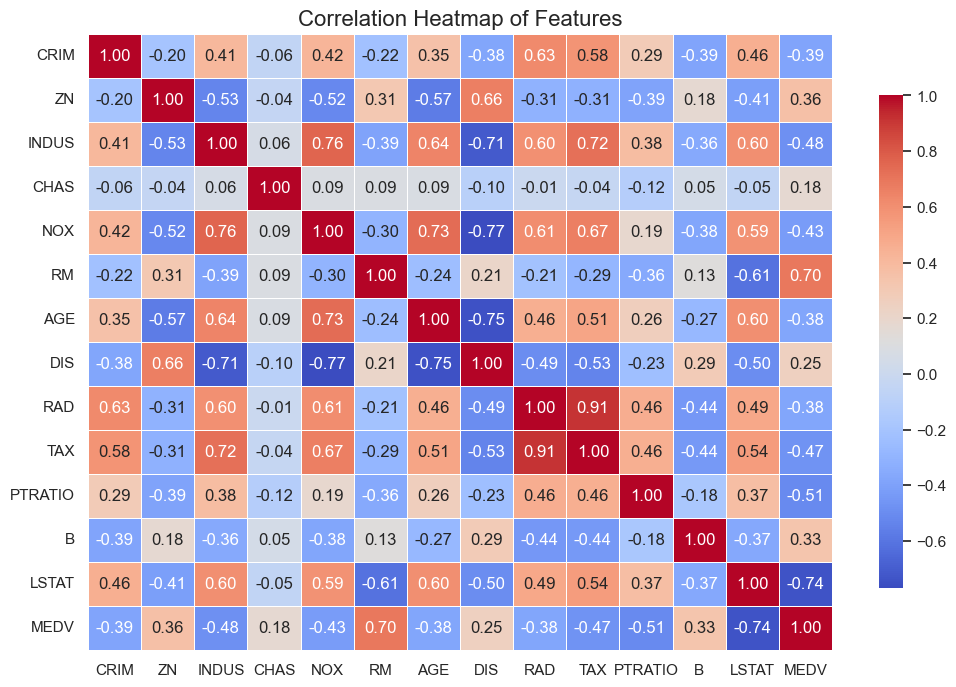

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


### 3.2 Distribution of the target variable (MEDV - house price)

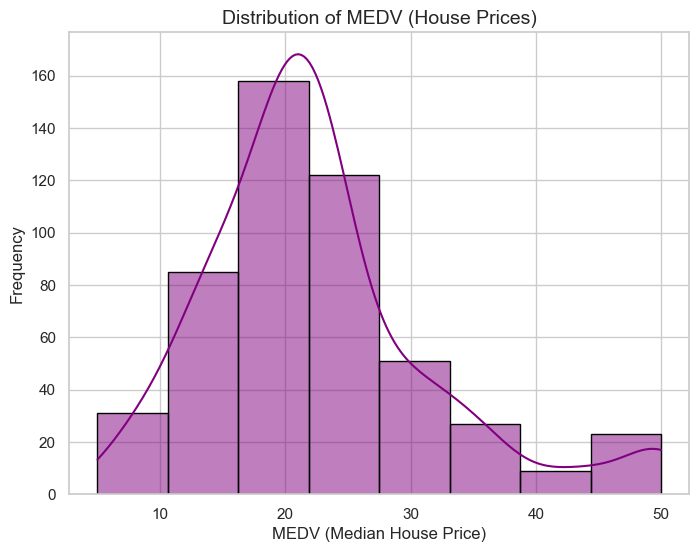

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(df1['MEDV'], bins=8, kde=True, color='purple', edgecolor='black')
plt.title('Distribution of MEDV (House Prices)', fontsize=14)
plt.xlabel('MEDV (Median House Price)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

This is a histogram with a kernel density estimate (KDE) plot showing the distribution of MEDV (Median House Prices). Here are some key insights based on the visual:

1. #### Distribution Shape:

   * The distribution of house prices is right-skewed, meaning that most houses have a median value concentrated on the lower end of the price scale (around 20 to 30), with fewer high-value properties (closer to 50).
   * The peak of the distribution occurs between 15 and 25 (most common range for house prices in this dataset).
2. #### Kurtosis:

   * The distribution is slightly platykurtic (flatter peak), meaning that the data is spread out with fewer extreme values compared to a normal distribution.

3. #### Outliers:

   * There are some data points on the far right (above 40), indicating that there are a few very expensive houses. These are outliers compared to the majority of the data.
4. #### Bimodal tendency:

   * There is a smaller secondary peak around 45, which suggests a small but distinct cluster of high-priced houses.

5. #### Range of Prices:

   * The house prices mostly range between 10 and 40, with the KDE showing some smoothing over the distribution, giving an idea of where the data density is highest.

#### In conclusion, most houses in this dataset are priced between $15k and $30k, with a small number of outliers being significantly more expensive, reaching prices closer to $50k.

### 3.3 Scatter plot of RM vs MEDV with trend line

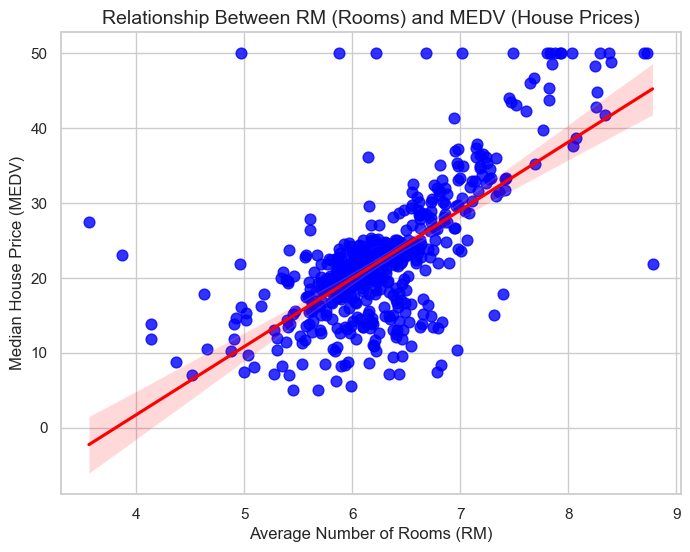

In [11]:
plt.figure(figsize=(8, 6))
sns.regplot(x='RM', y='MEDV', data=df1, scatter_kws={'s': 60, 'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship Between RM (Rooms) and MEDV (House Prices)', fontsize=14)
plt.xlabel('Average Number of Rooms (RM)', fontsize=12)
plt.ylabel('Median House Price (MEDV)', fontsize=12)
plt.show()

#### The plot demonstrates that the number of rooms is a significant factor in determining house prices, but additional factors (like outliers or possible data capping) should also be considered in further analysis.

### 3.4 Bar plot to show average house price per level of RAD 

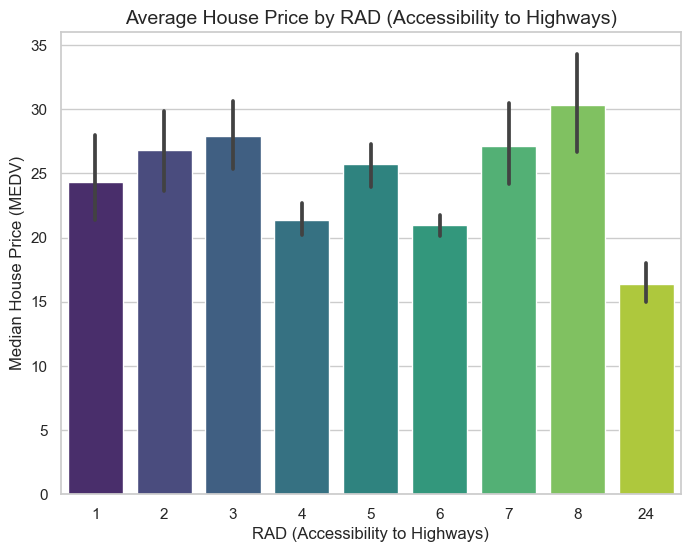

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='RAD', y='MEDV', data=df1, palette='viridis')
plt.title('Average House Price by RAD (Accessibility to Highways)', fontsize=14)
plt.xlabel('RAD (Accessibility to Highways)', fontsize=12)
plt.ylabel('Median House Price (MEDV)', fontsize=12)
plt.show()

####  1.The relationship between highway accessibility (RAD) and house prices is non-linear. 
####  2. Moderate highway accessibility, particularly RAD 8, appears to be associated with higher property values, while extreme accessibility (RAD 24) seems to have the opposite effect. 
####  3. This highlights a complex relationship where proximity to highways can either increase or decrease property value, depending on the level of accessibility.

### 3.5 Boston House Prices: distibution for each numeric variable

In [13]:
numeric_columns_boston = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [14]:
def dist_custom(dataset, columns_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        sns.kdeplot(dataset[data], ax=axs[i], fill=True,  alpha=.5, linewidth=0)
        axs[i].set_title(data + ', skewness is '+str(round(dataset[data].skew(axis = 0, skipna = True),2)))

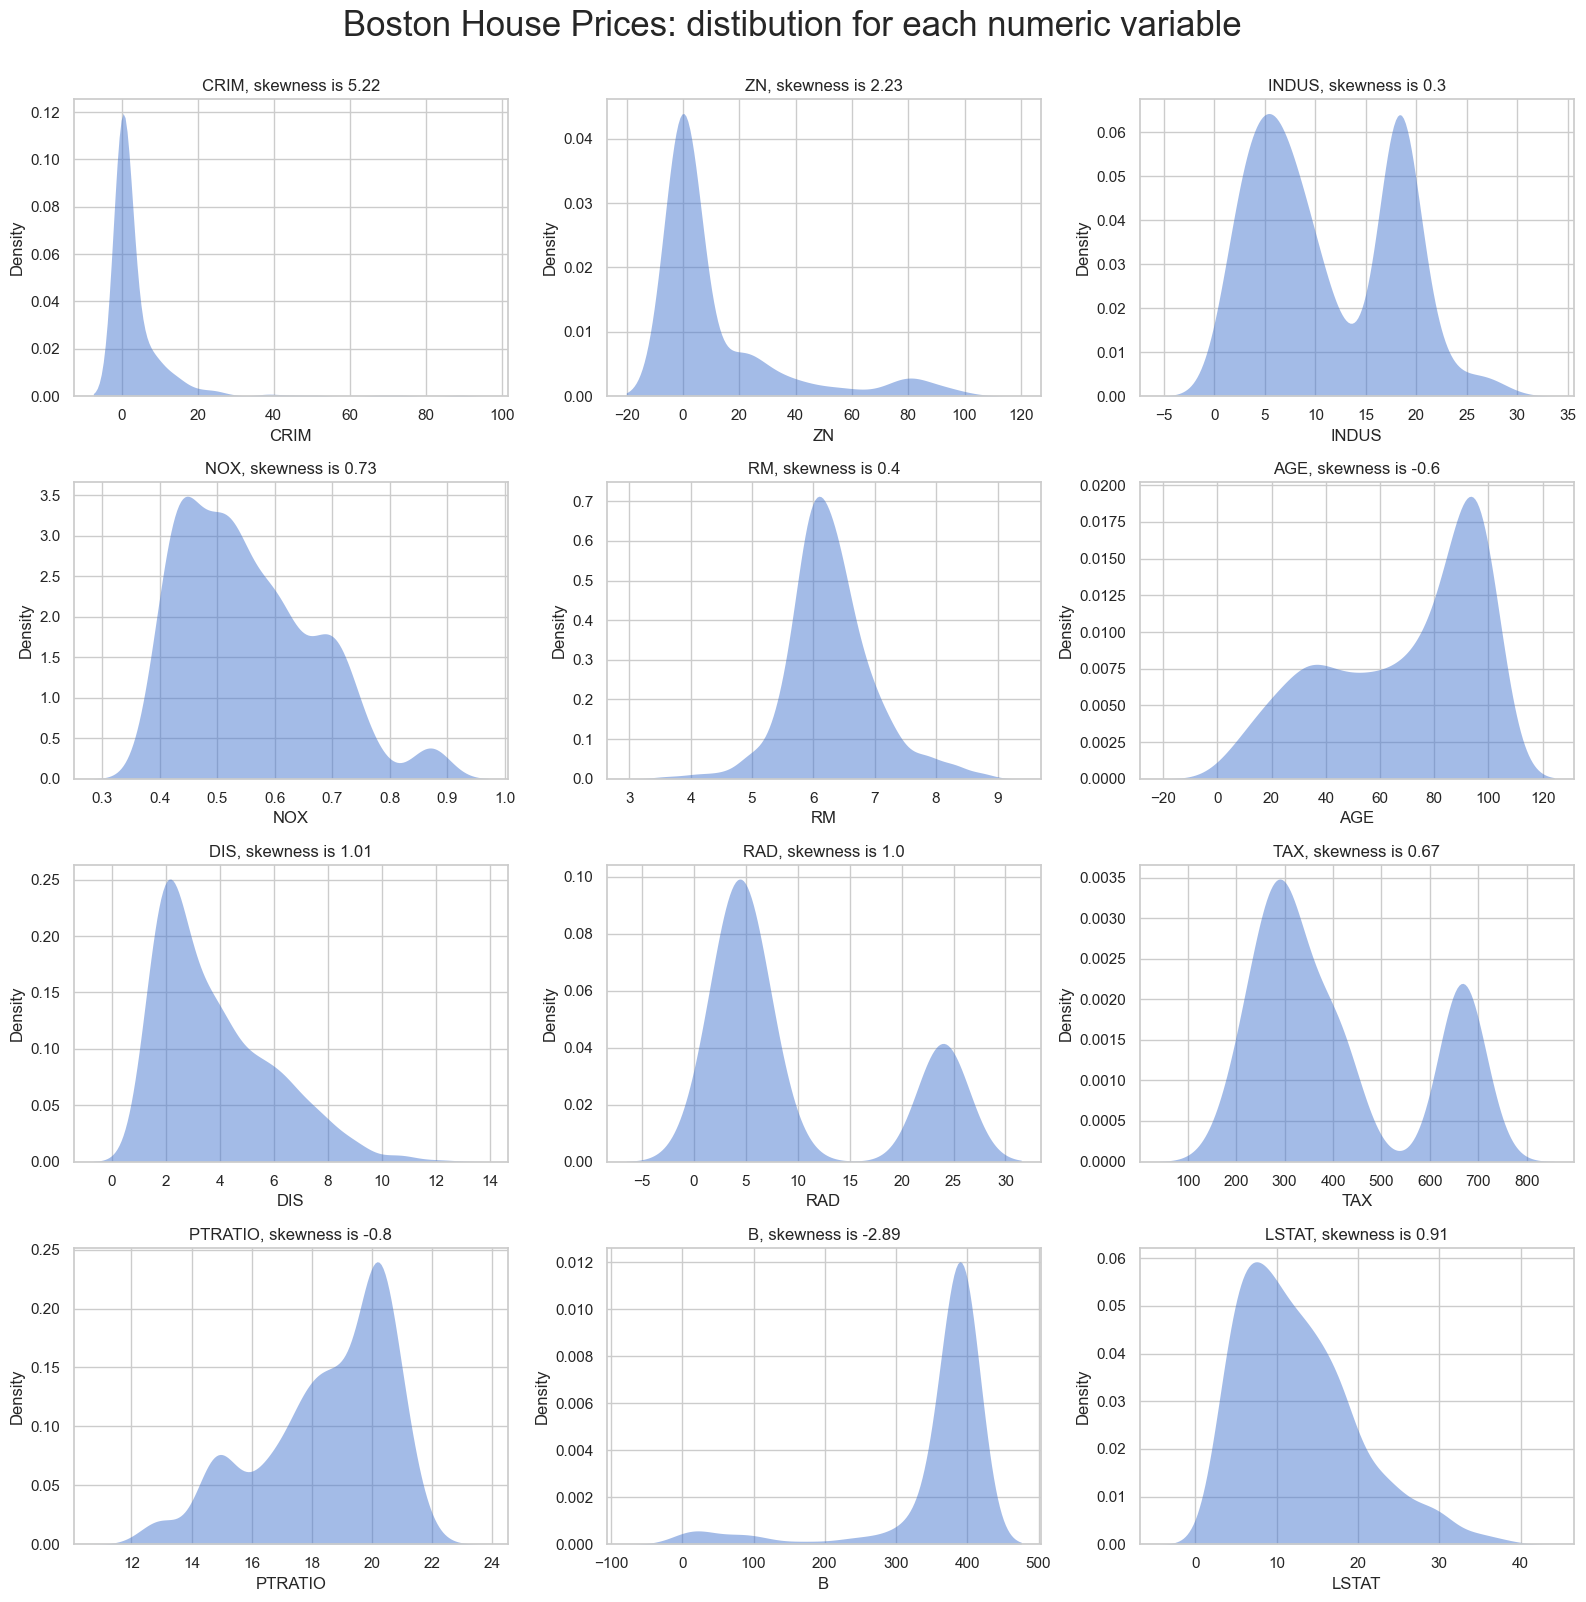

In [15]:
dist_custom(dataset=df1, columns_list=numeric_columns_boston, rows=4, cols=3, suptitle='Boston House Prices: distibution for each numeric variable')
plt.tight_layout()

## 4. Data Preprocessing

### 4.1 Outlier Detection and removal

#### The Tukey IQR method is a statistical procedure for identifying outliers in a data set using the interquartile range (IQR)

In [16]:
from collections import Counter

In [17]:
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
                
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
        
    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)        
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
    
    # Calculate the number of records below and above lower and above bound value respectively
    df1 = df[df[column] < Q1 - outlier_step]
    df2 = df[df[column] > Q3 + outlier_step]
    
    print('Total number of deleted outliers:', df1.shape[0]+df2.shape[0])
    
    return multiple_outliers

In [18]:
numeric_columns = ['CRIM', 'ZN', 'NOX', 'RM', 'AGE', 'DIS', 'PTRATIO', 'B', 'LSTAT']

Outliers_IQR = IQR_method(df1,1,numeric_columns)
# dropping outliers
df2 = df1.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers: 7


## 5. Regression Evaluation Metrics

We have to reduce the losses in regresssion

### 5.1. Mean Absolute Error

Mean Absolute Error (MAE) is a widely used metric in machine learning for evaluating the performance of regression models. It measures the average magnitude of the errors between the predicted and actual values without considering their direction (positive or negative).

### 5.2. Mean Square Error

Mean Squared Error (MSE) is a common metric used in machine learning, especially for evaluating regression models. It measures the average of the squared differences between the predicted and actual values. Squaring the errors emphasizes larger errors, making MSE sensitive to outliers.

### 5.3. Root Mean Square Error

Root Mean Squared Error (RMSE) is a commonly used metric for evaluating regression models in machine learning. It is the square root of the average of the squared differences between predicted and actual values, essentially providing a measure of how well the model is predicting the target variable in the same units as the original data.

### 5.4. R-squared Error

R² (R-squared), also known as the coefficient of determination, is a statistical measure that indicates how well a regression model fits the data. It represents the proportion of the variance in the dependent variable (target) that is predictable from the independent variable(s) (features).

### 5.5. Adjusted R-squared Error

Adjusted R² is a modified version of R² (coefficient of determination) that accounts for the number of independent variables (predictors) in a regression model. Unlike R², which can increase as more predictors are added to the model (even if those predictors don’t improve the model), Adjusted R² provides a more accurate measure of model performance by penalizing the addition of irrelevant variables.

### 5.6. Cross-validated R-squared Error

Cross-validated R² is a metric used to evaluate the performance of a regression model by applying cross-validation techniques. Unlike regular R², which is calculated on the same dataset used to train the model, cross-validated R² assesses the model's ability to generalize to unseen data by measuring how well it performs on multiple folds of the dataset.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [20]:
def Reg_Models_Evaluation_Metrics (model,X_train,y_train,X_test,y_test,y_pred):
    cv_score = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)
    
    # Calculating Adjusted R-squared
    r2 = model.score(X_test, y_test)
    # Number of observations is the shape along axis 0
    n = X_test.shape[0]
    # Number of features (predictors, p) is the shape along axis 1
    p = X_test.shape[1]
    # Adjusted R-squared formula
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    R2 = model.score(X_test, y_test)
    CV_R2 = cv_score.mean()

    return R2, adjusted_r2, CV_R2, RMSE
    
    print('RMSE:', round(RMSE,4))
    print('R2:', round(R2,4))
    print('Adjusted R2:', round(adjusted_r2, 4) )
    print("Cross Validated R2: ", round(cv_score.mean(),4) )

## 6. Train-Test Split

In [21]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## 7. Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [25]:
col_names = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X_train = Standard_Scaler (X_train, col_names)
X_test = Standard_Scaler (X_test, col_names)

## 8. Model Training

### 8.1 Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression

# Creating and training model
lm = LinearRegression()
lm.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = lm.predict(X_test)

In [27]:
ndf = [Reg_Models_Evaluation_Metrics(lm,X_train,y_train,X_test,y_test,y_pred)]

lm_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
lm_score.insert(0, 'Model', 'Linear Regression')
lm_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Linear Regression,0.65472,0.618227,0.67391,4.823995


### 8.2 Random Forest

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Creating and training model
RandomForest_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

In [29]:
RandomForest_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = RandomForest_reg.predict(X_test)

In [30]:
ndf = [Reg_Models_Evaluation_Metrics(RandomForest_reg,X_train,y_train,X_test,y_test,y_pred)]

rf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rf_score.insert(0, 'Model', 'Random Forest')
rf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest,0.800977,0.779942,0.784399,3.662459


### 8.3 Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

# Creating and training model
ridge_reg = Ridge(alpha=3, solver="cholesky")

In [32]:
ridge_reg.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_reg.predict(X_test)

In [33]:
ndf = [Reg_Models_Evaluation_Metrics(ridge_reg,X_train,y_train,X_test,y_test,y_pred)]

rr_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rr_score.insert(0, 'Model', 'Ridge Regression')
rr_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Ridge Regression,0.6556,0.6192,0.677292,4.817844


### 8.4 XG Boost

In [34]:
from xgboost import XGBRegressor
# create an xgboost regression model
XGBR = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.8, colsample_bytree=0.8)

In [35]:
XGBR.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = XGBR.predict(X_test)

In [36]:
ndf = [Reg_Models_Evaluation_Metrics(XGBR,X_train,y_train,X_test,y_test,y_pred)]

XGBR_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
XGBR_score.insert(0, 'Model', 'XGBoost')
XGBR_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,XGBoost,0.797718,0.776338,0.827201,3.692325


### 8.5 Random Forest Algorithm Recursive Feature Elimination (RFE)

In [37]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=60)
model = RandomForestRegressor()
rf_pipeline = Pipeline(steps=[('s',rfe),('m',model)])

In [38]:
rf_pipeline.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = rf_pipeline.predict(X_test)

In [39]:
ndf = [Reg_Models_Evaluation_Metrics(rf_pipeline,X_train,y_train,X_test,y_test,y_pred)]

rfe_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
rfe_score.insert(0, 'Model', 'Random Forest with RFE')
rfe_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.827928,0.809742,0.8069,3.405461


## 9. Model Evaluation

In [40]:
predictions = pd.concat([rfe_score, XGBR_score, rr_score, rf_score, lm_score], ignore_index=True, sort=False)
predictions

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Random Forest with RFE,0.827928,0.809742,0.806900,3.405461
1,XGBoost,0.797718,0.776338,0.827201,3.692325
2,Ridge Regression,0.655600,0.619200,0.677292,4.817844
3,Random Forest,0.800977,0.779942,0.784399,3.662459
4,Linear Regression,0.654720,0.618227,0.673910,4.823995


### 9.1 Visualizing Model Performance

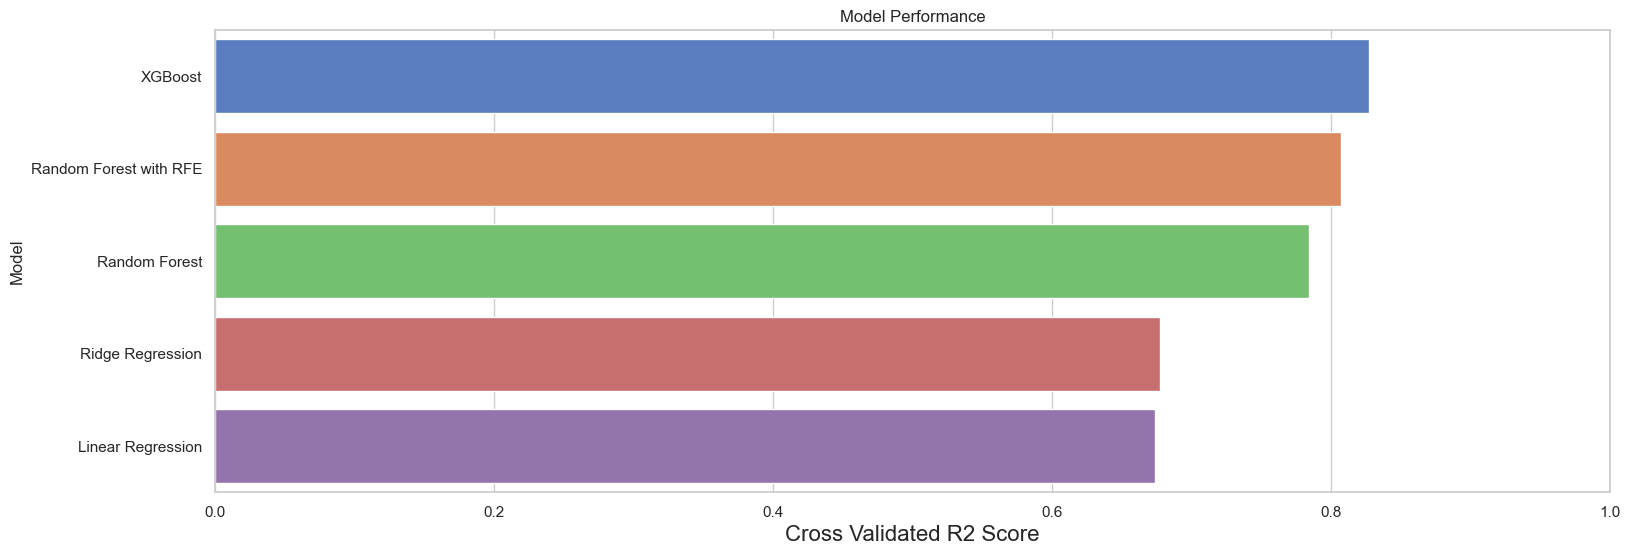

In [41]:
f, axe = plt.subplots(1,1, figsize=(18,6))

predictions.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = predictions, ax = axe)
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)

axe.set(title='Model Performance')

plt.show()

## 10. Hyperparameter Tuning

### 10.1 GridSearchCV

In [42]:
from sklearn.preprocessing import PolynomialFeatures
steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=3.8, fit_intercept=True))
]

ridge_pipe = Pipeline(steps)
ridge_pipe.fit(X_train, y_train)

# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)

In [43]:
from sklearn.model_selection import GridSearchCV

alpha_params = [{'model__alpha': list(range(1, 15))}]

clf = GridSearchCV(ridge_pipe, alpha_params, cv = 10)

In [44]:
# Fit and tune model
clf.fit(X_train, y_train)
# Model making a prediction on test data
y_pred = ridge_pipe.predict(X_test)
# The combination of hyperparameters along with values that give the best performance of our estimate specified
print(clf.best_params_)

{'model__alpha': 14}


In [45]:
ndf = [Reg_Models_Evaluation_Metrics(clf,X_train,y_train,X_test,y_test,y_pred)]

clf_score = pd.DataFrame(data = ndf, columns=['R2 Score','Adjusted R2 Score','Cross Validated R2 Score','RMSE'])
clf_score.insert(0, 'Model', 'Tuned Ridge Regression')
clf_score

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.739471,0.711936,0.759581,4.356196


### 10.2 Final Performance Comparision

In [47]:
result = pd.concat([clf_score, predictions], ignore_index=True, sort=False)
result

,Model,R2 Score,Adjusted R2 Score,Cross Validated R2 Score,RMSE
0,Tuned Ridge Regression,0.739471,0.711936,0.759581,4.356196
1,XGBoost,0.797718,0.776338,0.827201,3.692325
2,Random Forest with RFE,0.827928,0.809742,0.806900,3.405461
3,Random Forest,0.800977,0.779942,0.784399,3.662459
4,Ridge Regression,0.655600,0.619200,0.677292,4.817844
5,Linear Regression,0.654720,0.618227,0.673910,4.823995


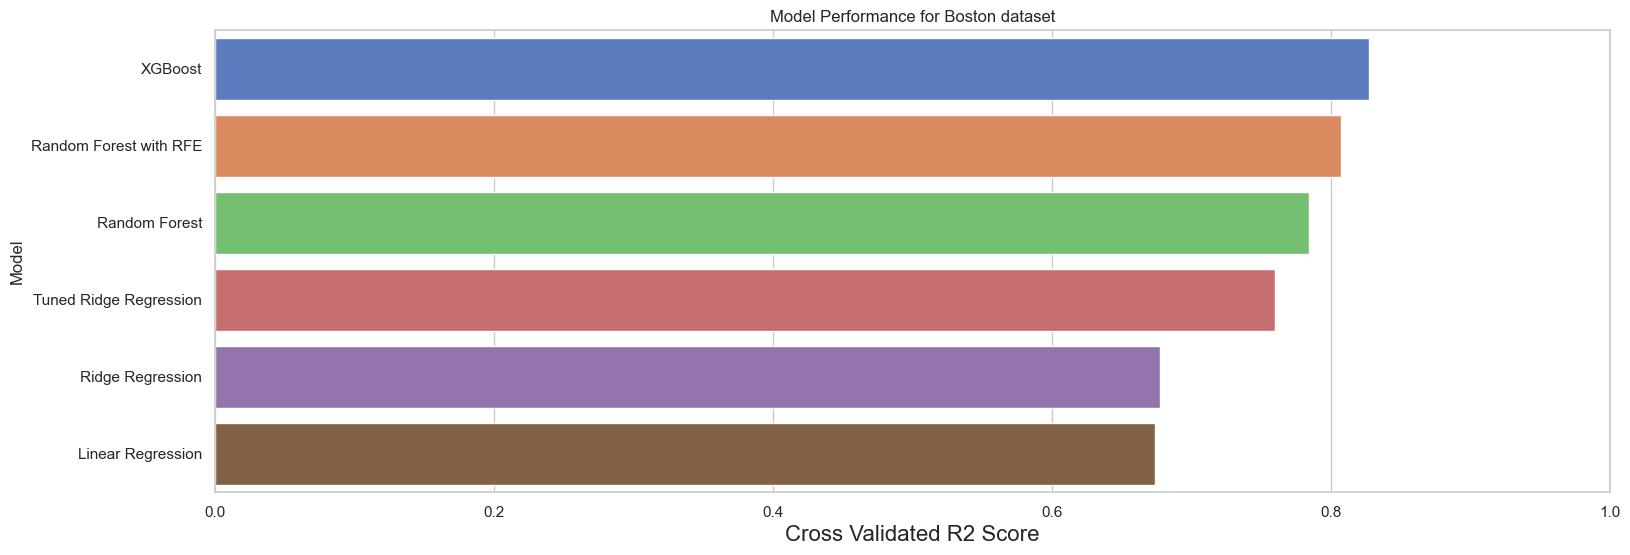

In [48]:
f, axe = plt.subplots(1,1, figsize=(18,6))

result.sort_values(by=['Cross Validated R2 Score'], ascending=False, inplace=True)

sns.barplot(x='Cross Validated R2 Score', y='Model', data = result, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross Validated R2 Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set(title='Model Performance for Boston dataset')

plt.show()

## 11. Insights on Model Training

#### 1. XGBoost performs the best, with the highest cross-validated R2 and R2 score, indicating it explains the most variance in the data and is likely the most accurate model for this task.

#### 2. Random Forest with Recursive Feature Elimination (RFE) performs similarly well, slightly lower than XGBoost, suggesting that feature selection helps optimize the Random Forest model.

#### Overall, tree-based models (XGBoost and Random Forest) outperform linear models, and incorporating feature selection and hyperparameter tuning improves model performance.